### Modelo de classificação: LSTM única camada

#### Download dataset

In [11]:
import tensorflow_datasets as tfds

# Download dataset pre-tokenizado
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

# Coleta tokens
tokenizer = info.features['text'].encoder

In [12]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

# Separa dados de treino e teste
train_data, test_data = dataset['train'], dataset['test'], 

# Shuffle dados de treino
train_dataset = train_data.shuffle(BUFFER_SIZE)

# pad nos datasets
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

### Build e compilação do modelo

In [13]:
import tensorflow as tf

# Hyperparametros
embedding_dim = 64
lstm_dim = 64
dense_dim = 64

# Build do modelo
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print summary do modelo
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 64)          523840    
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Determina parâmetros de treinamento
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Treinamento do modelo

In [15]:
NUM_EPOCHS = 5

history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/5
391/391 [==============================] - 52s 126ms/step - loss: 0.5636 - accuracy: 0.7004 - val_loss: 0.4537 - val_accuracy: 0.7987
Epoch 2/5
391/391 [==============================] - 49s 125ms/step - loss: 0.3706 - accuracy: 0.8460 - val_loss: 0.4101 - val_accuracy: 0.8328
Epoch 3/5
391/391 [==============================] - 48s 122ms/step - loss: 0.2693 - accuracy: 0.8963 - val_loss: 0.3782 - val_accuracy: 0.8504
Epoch 4/5
391/391 [==============================] - 47s 121ms/step - loss: 0.2096 - accuracy: 0.9223 - val_loss: 0.4704 - val_accuracy: 0.8219
Epoch 5/5
391/391 [==============================] - 47s 120ms/step - loss: 0.1863 - accuracy: 0.9309 - val_loss: 0.4629 - val_accuracy: 0.8354


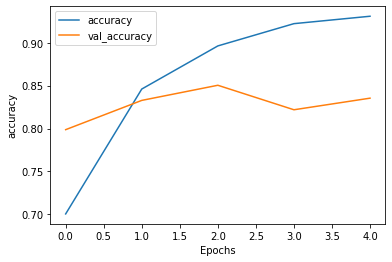

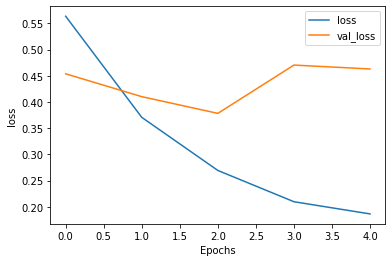

In [16]:
import matplotlib.pyplot as plt

# Plot métricas de avaliação
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results 
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### Modelo de classificação: LSTM multiplas camadas

### Build e compilação do modelo

In [17]:
import numpy as np

# Hiperparâmentros
batch_size = 1
timesteps = 20
features = 16
lstm_dim = 8

print(f'batch_size: {batch_size}')
print(f'timesteps (sequence length): {timesteps}')
print(f'features (embedding size): {features}')
print(f'lstm unidades de saída: {lstm_dim}')

# Define array de entrada com valores randomicos
random_input = np.random.rand(batch_size,timesteps,features)
print(f'shape array: {random_input.shape}')

# Define LSTM que retorna uma única saída
lstm = tf.keras.layers.LSTM(lstm_dim)
result = lstm(random_input)
print(f'shape da saída lstm (return_sequences=False): {result.shape}')

# Define LSTM que retorna uma sequência
lstm_rs = tf.keras.layers.LSTM(lstm_dim, return_sequences=True)
result = lstm_rs(random_input)
print(f'shape da saída lstm (return_sequences=True): {result.shape}')

batch_size: 1
timesteps (sequence length): 20
features (embedding size): 16
lstm unidades de saída: 8
shape array: (1, 20, 16)
shape da saída lstm (return_sequences=False): (1, 8)
shape da saída lstm (return_sequences=True): (1, 20, 8)


In [18]:
# Hiperparâmentros
embedding_dim = 64
lstm1_dim = 64
lstm2_dim = 32
dense_dim = 64

# Build do modelo
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm1_dim, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm2_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print summary do modelo
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 64)          523840    
                                                                 
 bidirectional_4 (Bidirectio  (None, None, 128)        66048     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 635,329
Trainable params: 635,329
Non-tr

In [19]:
# Determina parâmetros de treinamento
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Treinamento do modelo

In [20]:
NUM_EPOCHS = 5

# Treinamento do modelo
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/5
391/391 [==============================] - 100s 243ms/step - loss: 0.5507 - accuracy: 0.7125 - val_loss: 0.5200 - val_accuracy: 0.7378
Epoch 2/5
391/391 [==============================] - 92s 234ms/step - loss: 0.3977 - accuracy: 0.8310 - val_loss: 0.4639 - val_accuracy: 0.7927
Epoch 3/5
391/391 [==============================] - 92s 235ms/step - loss: 0.3096 - accuracy: 0.8752 - val_loss: 0.3820 - val_accuracy: 0.8389
Epoch 4/5
391/391 [==============================] - 92s 235ms/step - loss: 0.2537 - accuracy: 0.9038 - val_loss: 0.4865 - val_accuracy: 0.8344
Epoch 5/5
391/391 [==============================] - 92s 234ms/step - loss: 0.2165 - accuracy: 0.9206 - val_loss: 0.4905 - val_accuracy: 0.8379


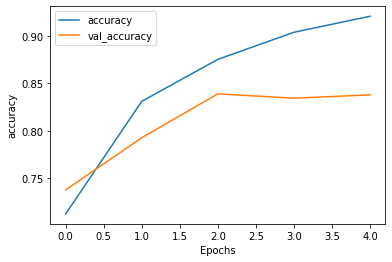

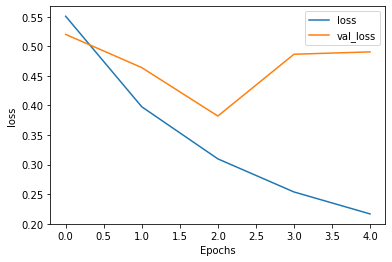

In [21]:
# Plot métricas de avaliação
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results 
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")